### Titulo

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error, r2_score

### Paso 1

Predecir los cargos médicos individuales (`charges`): El objetivo final sería construir un modelo de regresión para predecir el costo del seguro o los cargos médicos.

### Paso 2

In [98]:
df= pd.read_csv("../data/raw/medical-insurance-cost.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Paso 3

In [99]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Paso 4

In [102]:
df.duplicated().sum()

np.int64(1)

In [103]:
df.drop("charges", axis=1).duplicated().sum()

np.int64(3)

In [104]:
df = df.drop_duplicates(subset=df.columns.difference(['charges']))
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [105]:
if df.duplicated().sum():
    df = df.drop_duplicates()

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Paso 5: Análisis de Variables

#### Análisis de Variables Univariante

Una variable univariante es un término estadístico que se emplea para referenciar un conjunto de observaciones de un atributo. Esto es, el análisis columna a columna del DataFrame. Para ello, debemos distinguir si una variable es categórica o numérica, ya que el cuerpo del análisis y las conclusiones que se pueden obtener serán distintas.

#### Análisis de Variables Univariante Categóricas
Una variable categórica es un tipo de variable que puede tomar uno de un número limitado de categorías o grupos. Estos grupos son a menudo nominales (por ejemplo, el color de un coche: rojo, azul, negro, etc., pero ninguno de estos colores es inherentemente "mayor" o "mejor" que los demás) pero pueden también representarse mediante números finitos.

Para representar este tipo de variables utilizaremos histogramas. Antes de comenzar a graficar, debemos identificar cuáles son categóricas, y se puede comprobar fácilmente analizando el rango de valores.

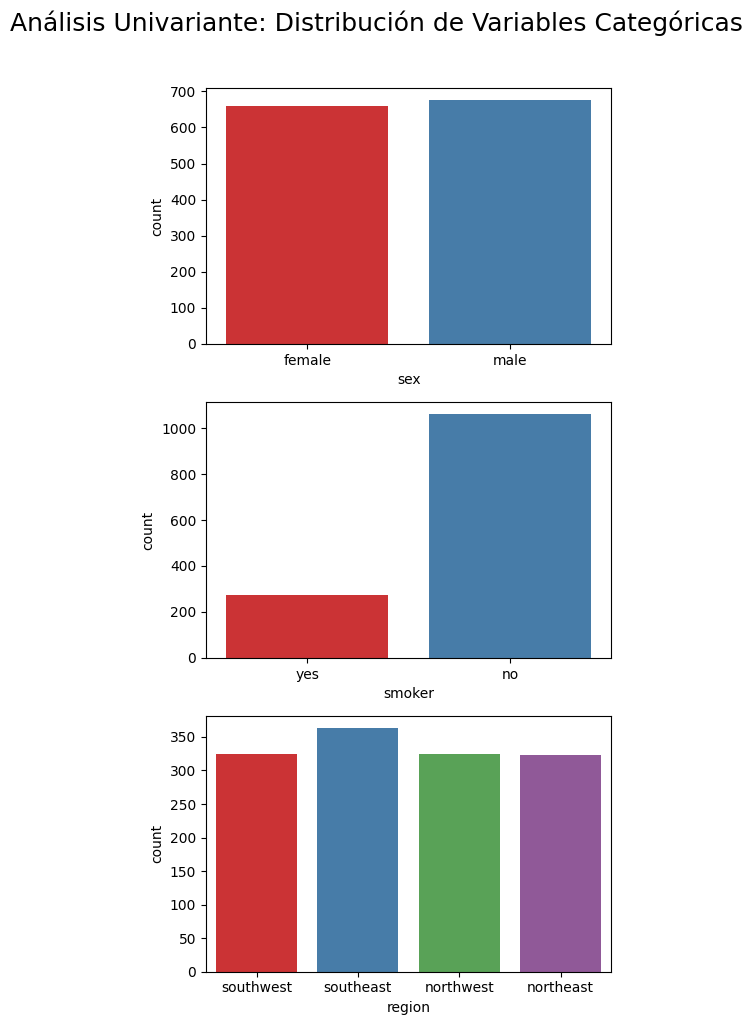

In [106]:
fig, axes = plt.subplots(3, figsize=(5, 10))
plt.suptitle('Análisis Univariante: Distribución de Variables Categóricas', fontsize=18, y=1.02)

sns.countplot(x='sex', data=df, ax=axes[0], palette='Set1', hue='sex', legend=False)
sns.countplot(x='smoker', data=df, ax=axes[1], palette='Set1', hue='smoker', legend=False)
sns.countplot(x='region', data=df, ax=axes[2], palette='Set1', hue='region', legend=False)


plt.tight_layout()
plt.show()


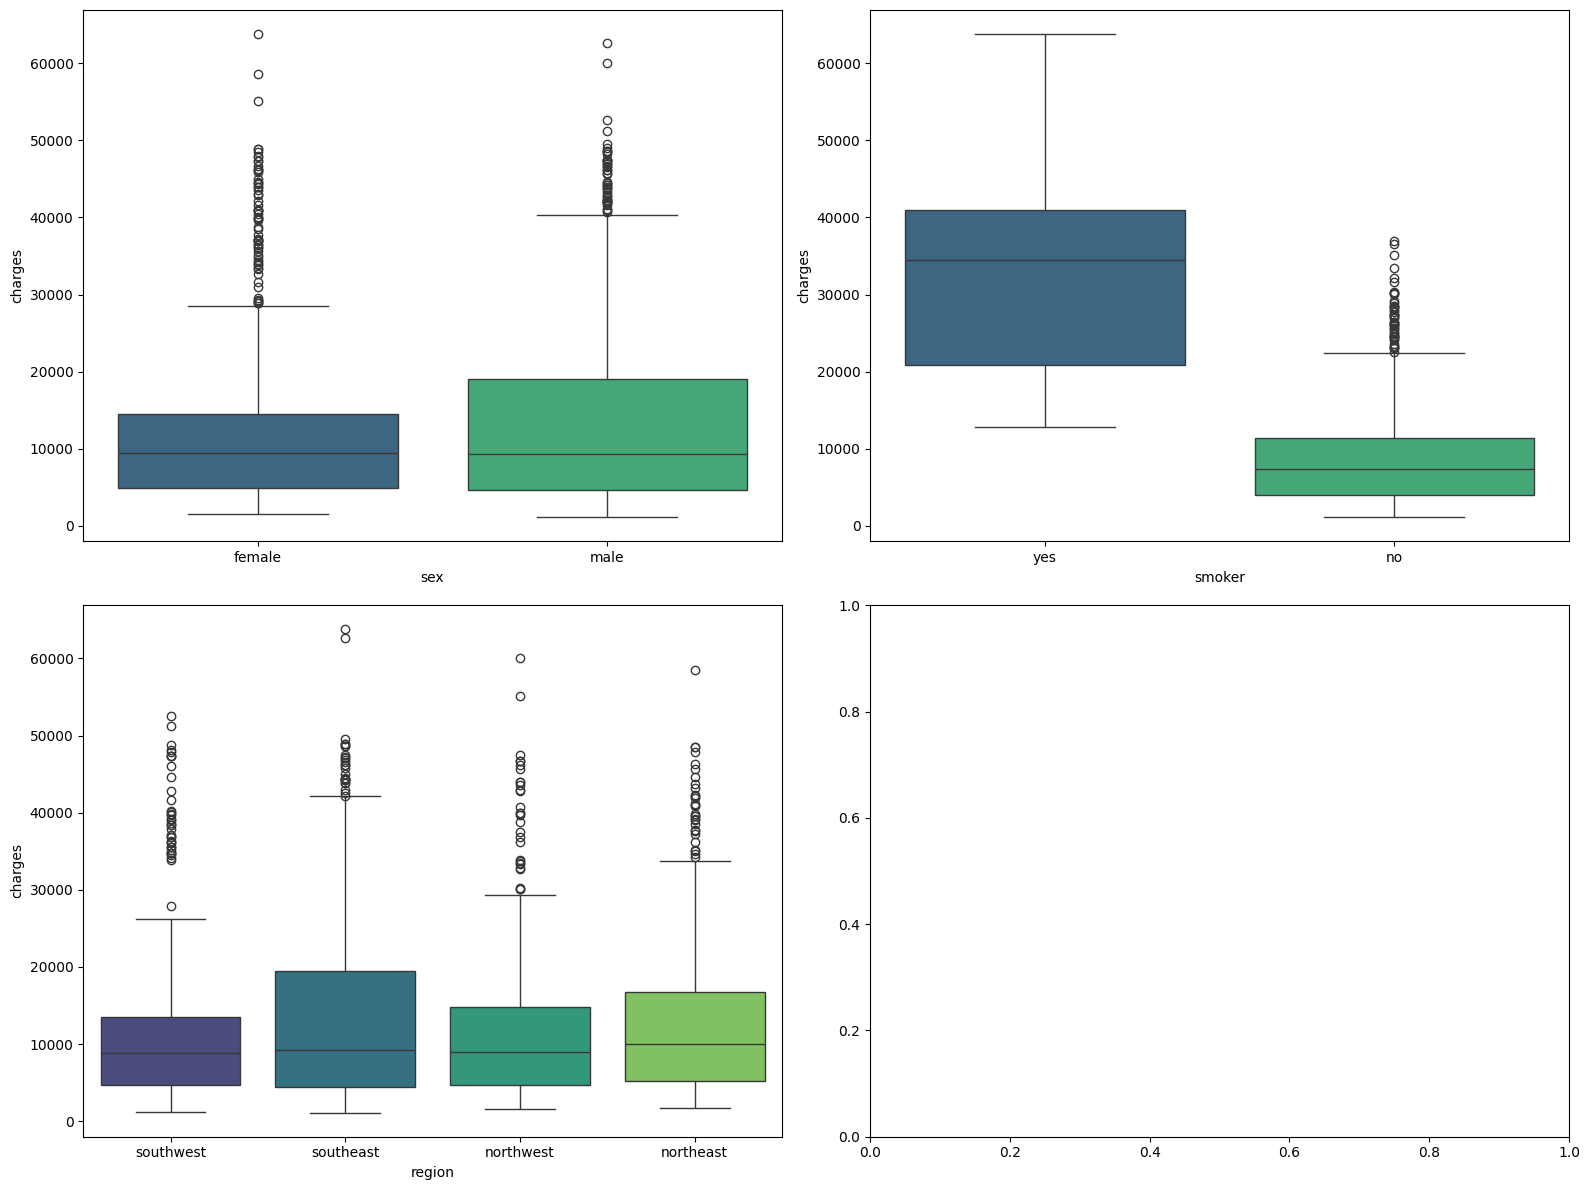

In [107]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: charges vs. sex
sns.boxplot(x='sex', y='charges', data=df, ax=axes[0, 0], palette='viridis')
# Plot 2: charges vs. smoker
sns.boxplot(x='smoker', y='charges', data=df, ax=axes[0, 1], palette='viridis')
# Plot 3: charges vs. region
sns.boxplot(x='region', y='charges', data=df, ax=axes[1, 0], palette='viridis')

plt.tight_layout()
plt.show()

#### Análisis de Variables Univariante Numéricas
Una variable numérica es un tipo de variable que puede tomar valores numéricos (enteros, fracciones, decimales, negativos, etc.) en un rango infinito.

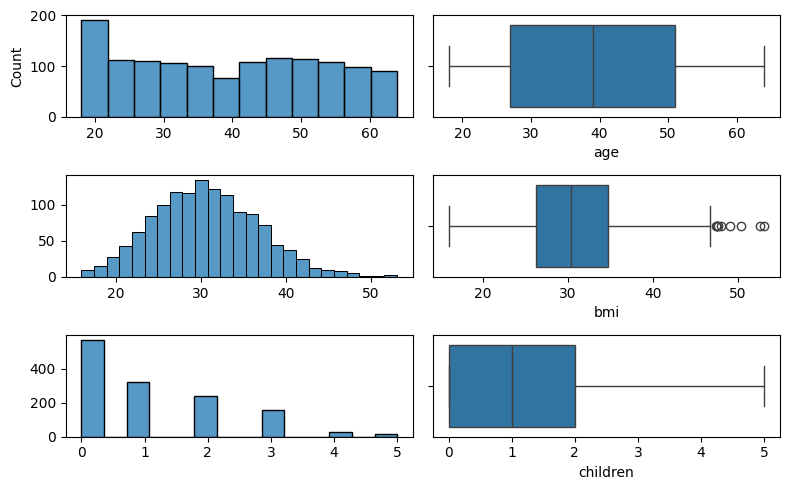

In [108]:
fig, axis = plt.subplots(3, 2, figsize=(8, 5), gridspec_kw={'height_ratios': [8,8,8]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax=axis[0, 0], data=df, x="age").set(xlabel=None)
sns.boxplot(ax=axis[0, 1], data=df, x="age")

sns.histplot(ax=axis[1, 0], data=df, x="bmi").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="bmi")

sns.histplot(ax=axis[2, 0], data=df, x="children").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[2, 1], data=df, x="children")
            
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Cargos Médicos')

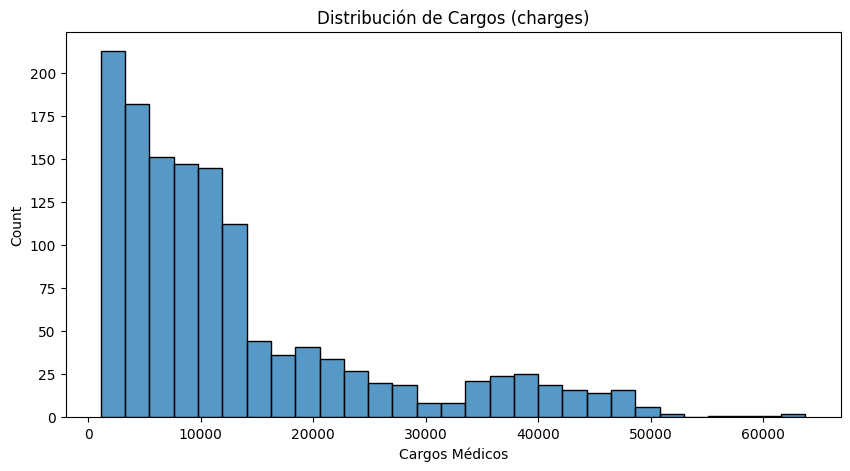

In [109]:
## Distribución de la Variable Objetivo: 'charges'
plt.figure(figsize=(10, 5))

sns.histplot(df['charges'])
plt.title('Distribución de Cargos (charges)')
plt.xlabel('Cargos Médicos')

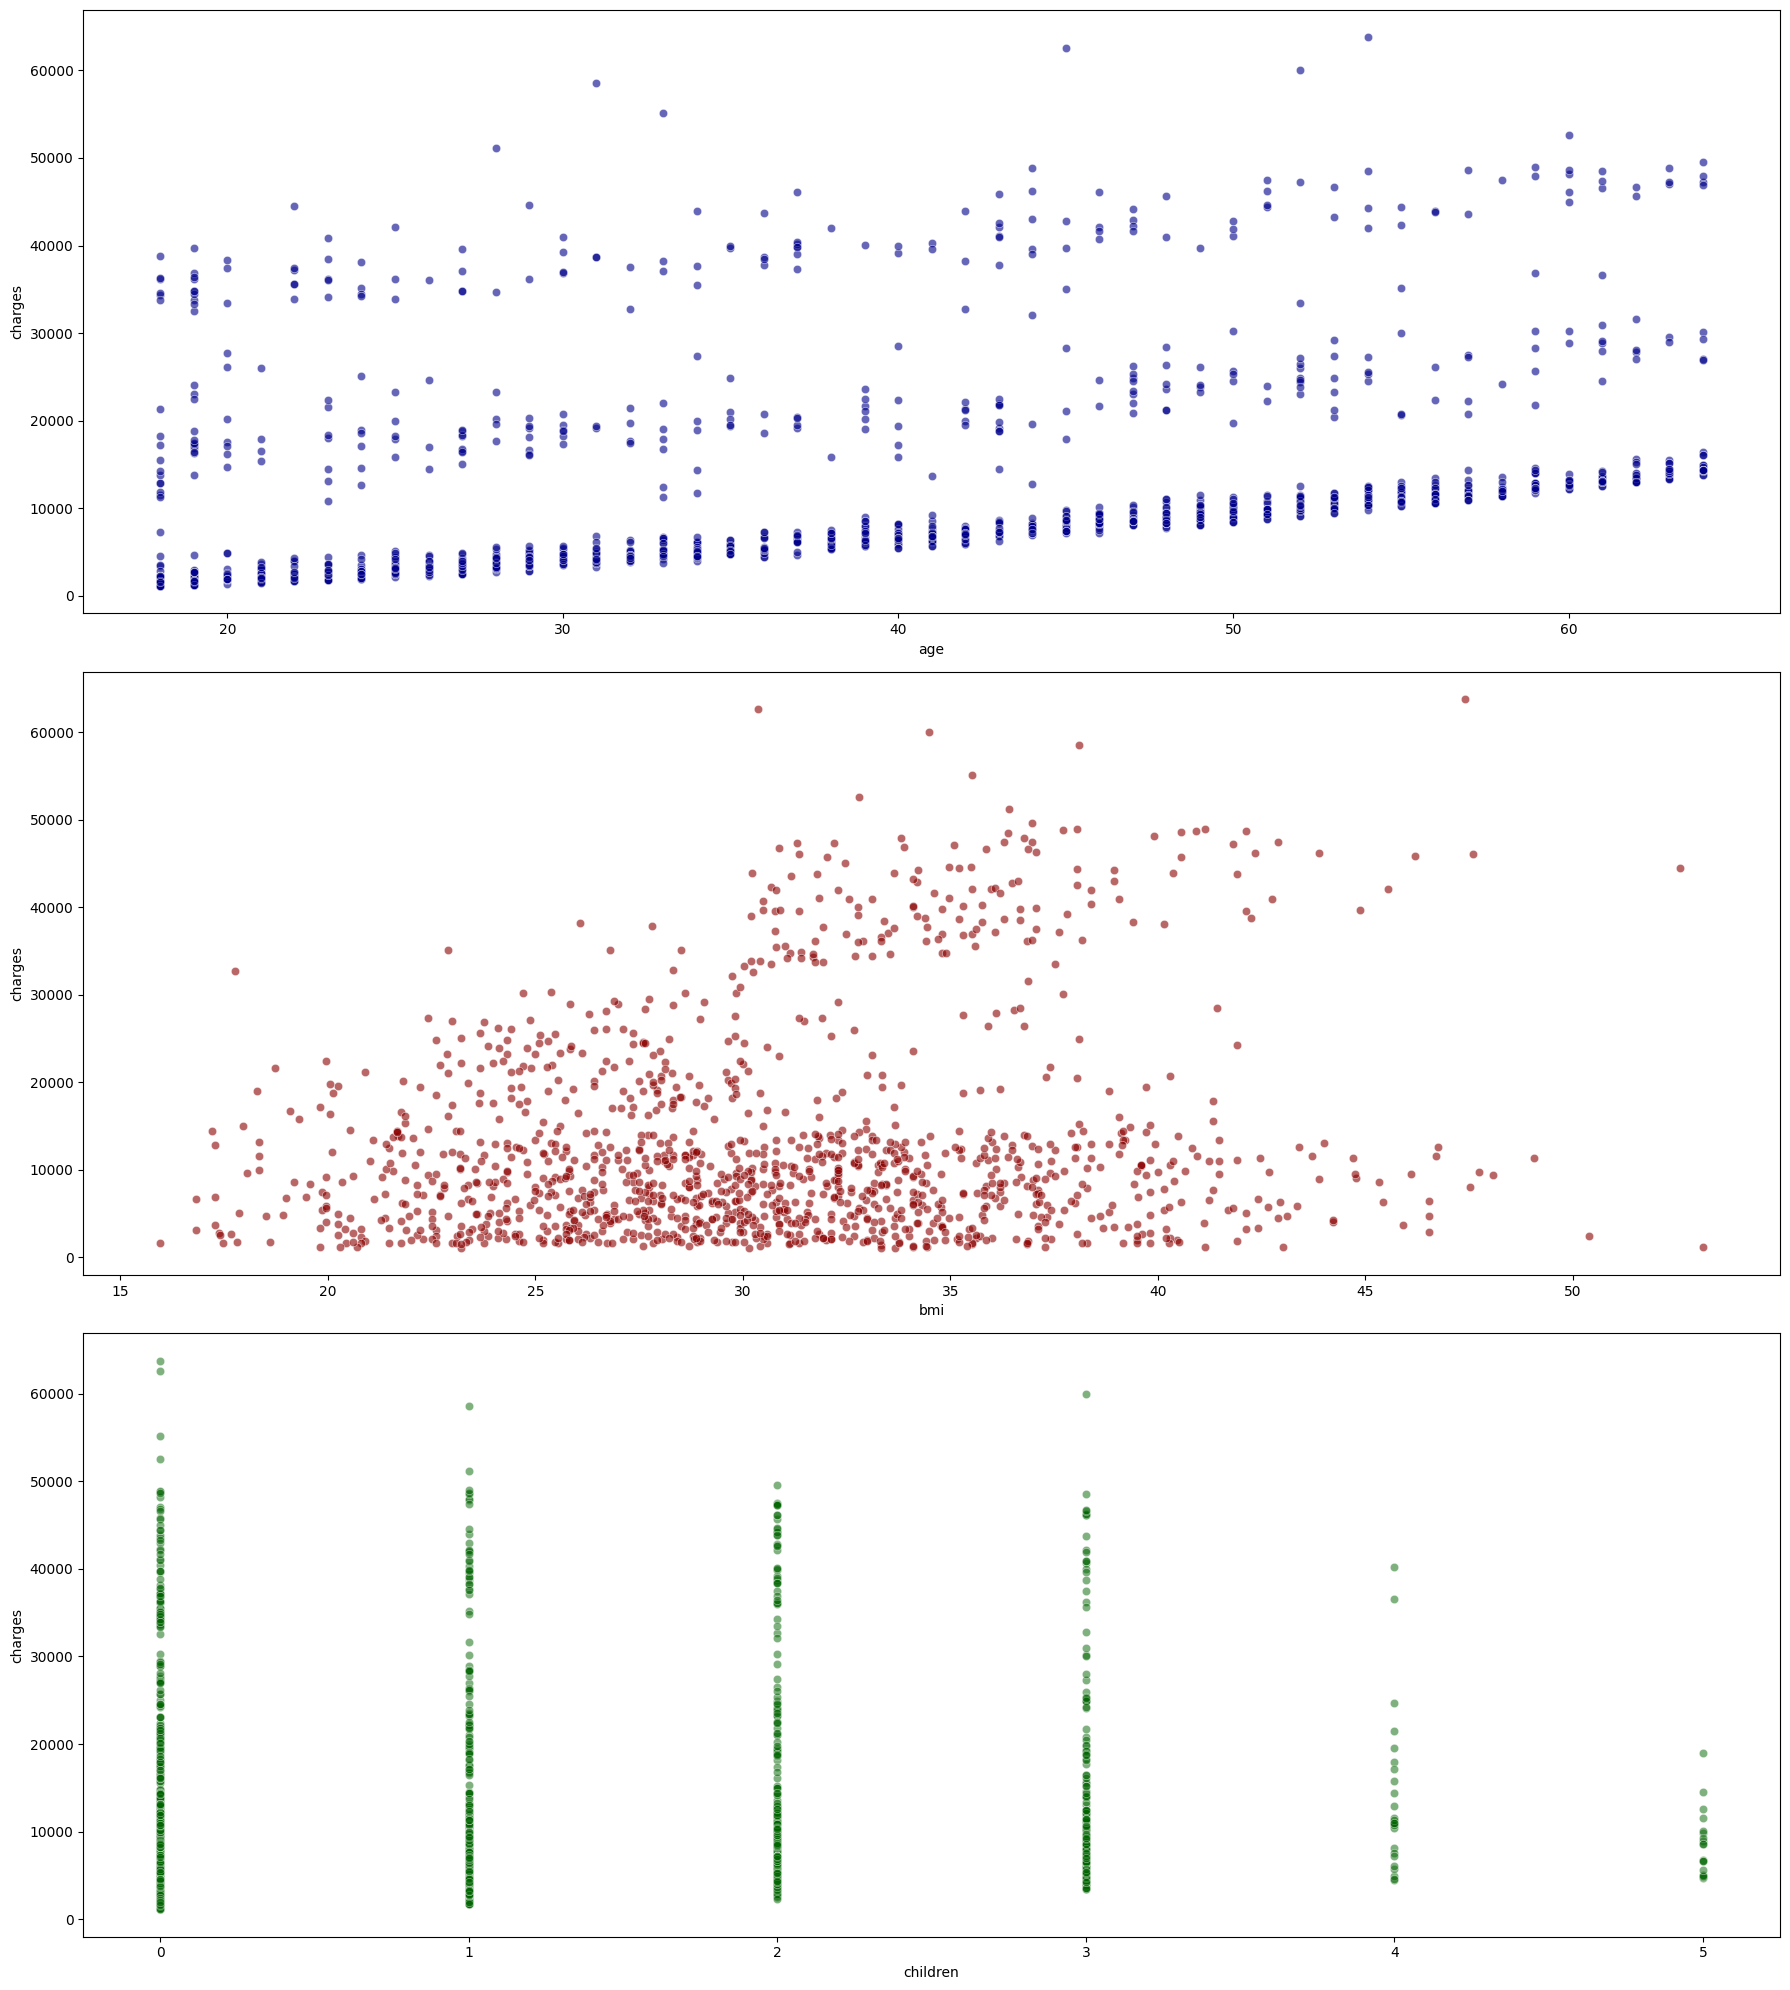

In [110]:
fig, axes = plt.subplots(3, figsize=(18, 20))
# Plot 1: age vs. charges
sns.scatterplot(x='age', y='charges', data=df, ax=axes[0], color='darkblue', alpha=0.6)
# Plot 2: bmi vs. charges
sns.scatterplot(x='bmi', y='charges', data=df, ax=axes[1], color='darkred', alpha=0.6)
# Plot 3: children vs. charges
sns.scatterplot(x='children', y='charges', data=df, ax=axes[2], color='darkgreen', alpha=0.5)


plt.tight_layout()
plt.show()

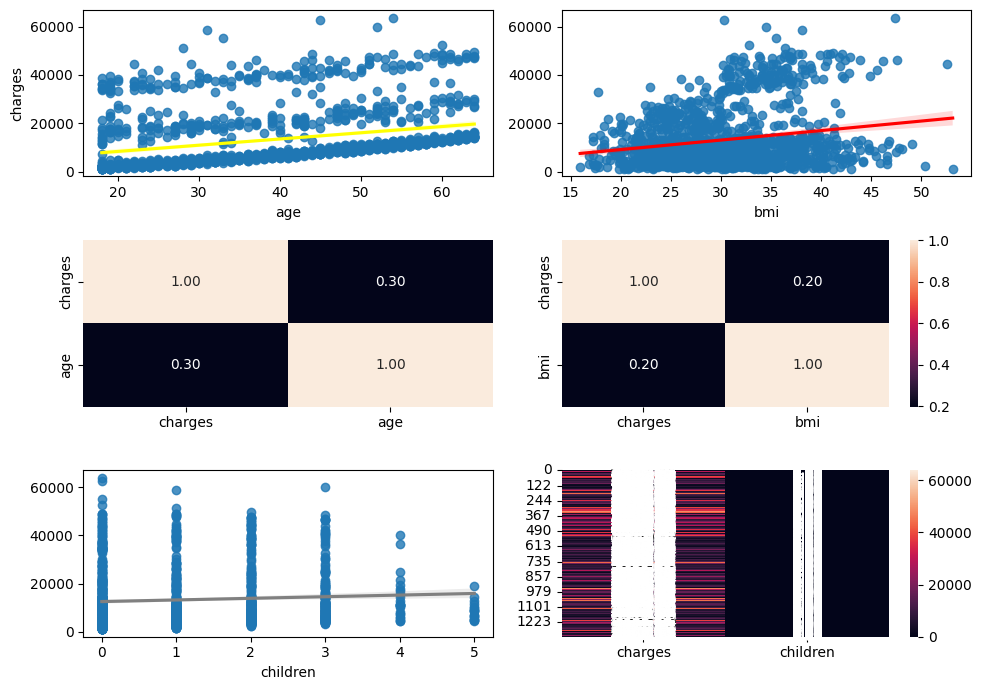

In [111]:
# Generamos las correlaciones
corr_charges_age = df[["charges", "age"]].corr()
corr_charges_bmi = df[["charges", "bmi"]].corr()
corr_charges_children = df[["charges", "children"]]
# Crear un diagrama de dispersión múltiple
fig, axis = plt.subplots(3, 2, figsize=(10, 7))

sns.regplot(ax=axis[0, 0], data=df, x="age", y="charges", line_kws={'color': 'yellow'})
sns.heatmap(ax=axis[1, 0], data= corr_charges_age, annot=True, fmt=".2f", cbar=False)

sns.regplot(ax=axis[0, 1], data=df, x="bmi", y="charges", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data= corr_charges_bmi, annot=True, fmt=".2f")

sns.regplot(ax=axis[2, 0], data=df, x="children", y="charges", line_kws={'color': 'gray'}).set(ylabel=None)
sns.heatmap(ax=axis[2, 1], data= corr_charges_children, annot=True, fmt=".2f")


plt.tight_layout()
plt.show()

#### Paso 6 

#### Split

In [112]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [113]:
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop('charges', axis=1)
y = df['charges']

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [114]:
y_train

662      5148.55260
147      9877.60770
305     19442.35350
1258    30063.58055
158     36950.25670
           ...     
1201     8733.22925
840      1526.31200
1147     2261.56880
275      9715.84100
1325    13143.33665
Name: charges, Length: 1068, dtype: float64

In [115]:
X_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [116]:
y_test.shape

(267,)

In [117]:
X_train.head()

,age,sex,bmi,children,smoker,region
662,32,female,31.540,1,no,northeast
147,51,female,37.730,1,no,southeast
305,29,male,33.345,2,no,northwest
1258,55,male,37.715,3,no,northwest
158,30,male,35.530,0,yes,southeast


In [118]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [119]:
# Guardar datasets procesados en data/processed

X_train_df.to_csv('../data/processed/X_train_segmed.csv', index=False)
X_test_df.to_csv('../data/processed/X_test_segmed.csv', index=False)
y_train_df.to_csv('../data/processed/y_train_segmed.csv', index=False)
y_test_df.to_csv('../data/processed/y_test_segmed.csv', index=False)

#### Scaling y Encoding

##### One-Hot Encoding

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   int64  
 4   smoker    1335 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1335 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.4+ KB


In [121]:
# Genero una lista con los nombres SOLO de las columnas categóricas
cat_variables = ['sex', 'smoker', 'region']

# Creamos la instancia del encoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# Entrenamos el encoder con los datos de entrenamiento (ajustamos)
onehot_encoder.fit(X_train[cat_variables])

# Aplicamos el encoder en el conjunto de entrenamiento: X_train
X_train_cat_ohe = onehot_encoder.transform(X_train[cat_variables])
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe,
                               index=X_train.index,
                               columns=onehot_encoder.get_feature_names_out(cat_variables))

# Aplicamos el encoder en el conjunto de test: X_test
X_test_cat_ohe = onehot_encoder.transform(X_test[cat_variables])
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe,
                              index=X_test.index,
                              columns=onehot_encoder.get_feature_names_out(cat_variables))

X_train_cat_ohe.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
662,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
147,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
305,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1258,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
158,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


##### Escalado Mínimo-Máximo

In [122]:
min_max_scaler = MinMaxScaler()

# Genero una lista con los nombres SOLO de las columnas numéricas sin mi target.
num_variables = ['age', 'bmi', 'children']

min_max_features_train = min_max_scaler.fit_transform(X_train[num_variables])

df_min_max_train = pd.DataFrame(min_max_features_train,
                          index=X_train.index,
                          columns=num_variables)
df_min_max_train


,age,bmi,children
662,0.304348,0.405480,0.2
147,0.717391,0.575933,0.2
305,0.239130,0.455184,0.4
1258,0.804348,0.575520,0.6
158,0.260870,0.515352,0.0
...,...,...,...
1201,0.608696,0.648768,0.4
840,0.065217,0.393364,0.0
1147,0.043478,0.415944,0.0
275,0.630435,0.269448,0.4


In [123]:
min_max_features_test = min_max_scaler.transform(X_test[num_variables])

df_min_max_test = pd.DataFrame(min_max_features_test,
                          index=X_test.index,
                          columns=num_variables)
df_min_max_test

,age,bmi,children
860,0.413043,0.847721,0.4
789,0.956522,0.360870,0.0
430,0.021739,0.448437,0.0
992,0.695652,0.407132,0.4
14,0.195652,0.697095,0.0
...,...,...,...
8,0.413043,0.358392,0.4
987,0.586957,0.298224,0.2
1002,0.130435,0.247418,0.0
657,0.195652,0.449952,0.4


##### Selección de características.

In [124]:
# Concatenar numéricas escaladas + categóricas codificadas
X_train_final = pd.concat([df_min_max_train, X_train_cat_ohe], axis=1)
X_test_final = pd.concat([df_min_max_test, X_test_cat_ohe], axis=1)


In [125]:
X_train_final.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
662,0.304348,0.405480,0.2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
147,0.717391,0.575933,0.2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
305,0.239130,0.455184,0.4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1258,0.804348,0.575520,0.6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
158,0.260870,0.515352,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [126]:
selection_model = SelectKBest(f_regression, k=4)

# Entreno el modelo mediante fit()
selection_model.fit(X_train_cat_ohe, y_train)

ix = selection_model.get_support()

# Aplico el modelo a los datos X_train y X_test del que hemos codificado a numérico (del One_hot Encoding)
X_train_sel  = selection_model.transform(X_train_cat_ohe)
X_test_sel = selection_model.transform(X_test_cat_ohe)

# Genero los dataframes
X_train_sel = pd.DataFrame(X_train_sel, columns=X_train_cat_ohe.columns.values[ix])
X_test_sel = pd.DataFrame(X_test_sel, columns=X_test_cat_ohe.columns.values[ix])


In [127]:
X_test_sel

,sex_male,smoker_no,smoker_yes,region_southeast
0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0
2,1.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,1.0
...,...,...,...,...
262,1.0,1.0,0.0,0.0
263,0.0,1.0,0.0,0.0
264,1.0,1.0,0.0,0.0
265,1.0,1.0,0.0,0.0


In [128]:
y_test

860     46113.51100
789     13457.96080
430     23082.95533
992     10118.42400
14      39611.75770
           ...     
8        6406.41070
987     28340.18885
1002     1972.95000
657      4058.71245
365      9778.34720
Name: charges, Length: 267, dtype: float64

#### Paso 7

##### Machine Learning (Modelado)

In [129]:
def warn(*args, **kwargs):
    pass

warnings.warn = warn

In [130]:
model = LinearRegression(fit_intercept=True, copy_X=True, tol=1e-06, n_jobs=None, positive=False)

In [131]:
model.fit(X_train_sel, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [132]:
# Vemos el Intercepto
model.intercept_

np.float64(20229.283459133207)

In [133]:
# Vemos el Coeficiente
model.coef_

array([   -63.27809222, -11912.50196745,  11912.50196745,    415.26652747])

In [134]:
model.fit(X_train_final, y_train)  # Usar X_train_final
y_pred = model.predict(X_test_final)  # Usar X_test_final
y_pred

array([37613.43098103, 12990.54498174,  2763.45170957, 11617.67452688,
       31866.92721875, 11646.22158312,  9584.49913335,  6053.12015245,
        7826.69121736, 10424.22058497,  7795.26984505, 11482.29271789,
       10374.58182908, 12176.69112512,  2571.01392665, 15079.1304526 ,
        9316.48936428, 11365.17596604, 27891.21698795, 10507.94226538,
       15813.42697827, 11634.24505769, 12724.33365636,  8501.95695137,
       33625.9431118 , 10145.33938918, 16230.39194044, 16984.16629565,
       10423.04788589,  9612.23986279,  9340.08613369,  3966.16069585,
        3975.48198833, 30442.9345755 , 39235.2187226 ,  2830.0675955 ,
        5248.84427107, 14766.16608087,  4933.32010145,  3906.4166557 ,
        8306.98114363, 11469.33977595, 13948.42514934,  5618.76026944,
        8132.02936893, 14451.65916757,  4276.37862077,  3741.61809902,
       13781.92903114, 33460.96358808,  5869.10188183, 10325.93849958,
        9215.84219258,  3821.76667015, 11399.03365445, 11303.52873912,
      

In [135]:
#Error cuadrático medio:
mean_squared_error(y_test, y_pred)


36453416.54127397

In [136]:
#Coeficiente de determinación: 
r2_score(y_test, y_pred)

0.7292679486118421

In [137]:
y_pred_train = model.predict(X_train_final)
y_pred_train

array([ 7263.42673203, 13287.04297936,  7484.84291972, ...,
        3744.00366188, 10088.27202178, 14633.03750951], shape=(1068,))

In [138]:
#Coeficiente de determinación: 
r2_score(y_train, y_pred_train)

0.7555258594557396

##### Final

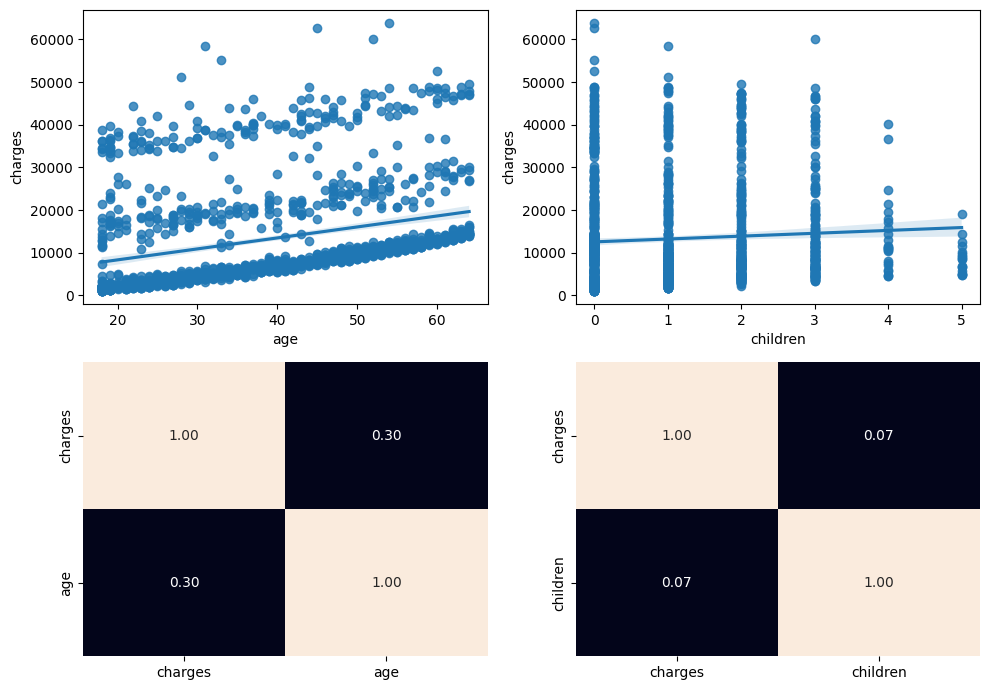

In [139]:

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "charges")
sns.heatmap(df[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "children", y = "charges")
sns.heatmap(df[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

plt.tight_layout()
plt.show()